# Setting up GPU

In [1]:
# Clone the Darknet repo from https://github.com/AlexeyAB/darknet
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15549, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 15549 (delta 10), reused 24 (delta 6), pack-reused 15514
Receiving objects: 100% (15549/15549), 14.24 MiB | 17.34 MiB/s, done.
Resolving deltas: 100% (10422/10422), done.


In [2]:
# Change the setting in the makefile to enable
# GPU, CUDA and OPENCV
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [ ]:
# Check if the cuda is available and what version we are using
!/usr/local/cuda/bin/nvcc --version

In [ ]:
# Build the darknet
!make

In [23]:
# Define some functions for reusability
def display_image(image_path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  img = cv2.imread(image_path)
  h, w = img.shape[:2]
  resize = cv2.resize(img, (3 * w, 3 * h), interpolation=cv2.INTER_CUBIC)

  figure = plt.gcf()
  figure.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resize, cv2.COLOR_BGR2RGB))
  plt.show()

# Use this function to upload files
def upload_files():
  from google.colab import files
  uploaded_files = files.upload()
  for file_name, data in uploaded_files.items():
    with open(file_name, 'wb') as file:
      file.write(data)
      print('Saved file', file_name)

# Use this function to download a file
def download_file(file_path):
  from google.colab import files
  files.download(file_path)


# Mount Google Drive into Collab File System

In [5]:
# To check the current working directory
!pwd

/content/darknet


In [6]:
# Mount google drive into google collab
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/content
Mounted at /content/gdrive


In [7]:
# Create symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive (performing a pointer operation)
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

 Agriculture   Buildbox		  Core-Subjects   Extras  'My Drive'
 Books	      'Colab Notebooks'   Credentials	  Junk	   WeedDetection


### From github copy WeedDetection folder and paste it into Google Drive root directory.

In [8]:
!ls /mydrive/WeedDetection

WeedDetectionSystem


In [9]:
# Copy the zip file from google drive file to collab contents directory
!cp /content/gdrive/MyDrive/WeedDetection/WeedDetectionSystem/Images-with-bounding-boxes.zip /content


In [10]:
# Change directory to darknet
%cd darknet

/content/darknet


In [ ]:
# unzip the zip file and its contents should now be in /darknet/data/obj
!unzip ../Images-with-bounding-boxes.zip -d data/


In [12]:
!cd /content/darknet/data/
!mv /content/darknet/data/Images-with-bounding-boxes/* /content/darknet/data
!rmdir /content/darknet/data/Images-with-bounding-boxes

In [13]:
!cd /content/darknet

In [14]:
# Copy the cnn_config file from
# /mydrive/WeedDetection/WeedDetectionSystem/ to /content/darknet/cfg
!cp /mydrive/WeedDetection/WeedDetectionSystem/cnn_config.cfg ./cfg

# upload the custom .cfg to Google collab file system from Google Drive
#%cd cfg
#upload_files()
#%cd ..

In [15]:
# Copy the obj.names and obj.data files /content/darknet/data
!cp /mydrive/WeedDetection/WeedDetectionSystem/obj.names ./data
!cp /mydrive/WeedDetection/WeedDetectionSystem/obj.data  ./data

# upload the obj.names and obj.data here (if any custom file)
#%cd data
#upload_files()
#%cd ..

In [16]:
# upload the generate_train.py script to collab
!cp /mydrive/WeedDetection/WeedDetectionSystem/generate_train.py ./

# upload the generate_train.py script here (if any custom file)
#upload_files()

In [17]:
#
!python generate_train.py

In [18]:
# train.txt file should have to here.
!ls data/train_data

data  train.txt


In [19]:
# upload pretrained convolutional layer weights
!wget http://pjreddie.com/media/files/darknet53.conv.74



--2023-08-17 21:38:26--  http://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://pjreddie.com/media/files/darknet53.conv.74 [following]
--2023-08-17 21:38:27--  https://pjreddie.com/media/files/darknet53.conv.74
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  55.1MB/s    in 2.8s    

2023-08-17 21:38:30 (55.1 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



In [ ]:
# press ctrl+shift+i (inspect) than paste below code in console tab
# code to make sure the collab session stays active
'''
function ClickConnect(){
console.log("Working");
document.querySelector("colab-toolbar-button#connect").click()
}
setInterval(ClickConnect,60000)
'''

# Training

In [21]:
# train the model
!./darknet detector train data/obj.data cfg/cnn_config.cfg darknet53.conv.74 -dont_show

Streaming output truncated to the last 5000 lines.
 total_bbox = 193815, rewritten_bbox = 0.010319 % 
]2;3962/4000: loss=0.2 hours left=0.2
 3962: 0.220027, 0.302329 avg loss, 0.000010 rate, 5.979926 seconds, 126784 images, 0.161986 hours left
Loaded: 0.000041 seconds
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.844578), count: 1, class_loss = 0.008325, iou_loss = 0.051725, total_loss = 0.060050 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.000000), count: 1, class_loss = 0.000010, iou_loss = 0.000000, total_loss = 0.000010 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
 total_bbox = 193816, rewritten_bbox = 0.010319 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.771093), count: 2, class_loss = 0.354831, iou_loss = 0.744930, total_loss = 1.099761 
v3 (m

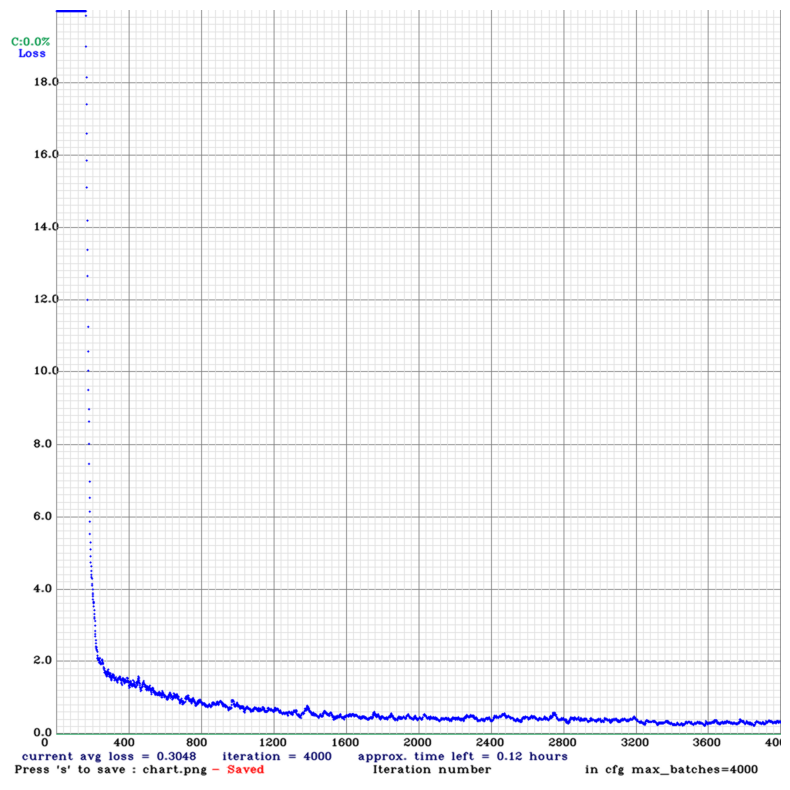

In [24]:
# Display the graph generated from training model
# location: content/darknet/chart.png
display_image('chart.png')

# Testing

In [26]:
# set our custom cfg to test mode
%cd cfg
!sed -i 's/batch=32/batch=1/' cnn_config.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' cnn_config.cfg
%cd ..

/content/darknet/cfg
/content/darknet


In [27]:
!ls /mydrive/WeedDetection/WeedDetectionSystem/test

crop_1.jpeg  crop_3.jpeg  weed_1.jpeg  weed_3.jpeg  weed_5.jpeg
crop_2.jpeg  crop_4.jpeg  weed_2.jpeg  weed_4.jpeg  weed_6.jpeg


Image Detection is performed on Single Image. The path link can be change to test for a different image.

In [31]:
# run your custom test with this command
# detection is performed on the following image : /mydrive/WeedDetection/WeedDetectionSystem/test/weed_1.jpeg
!./darknet detector test data/obj.data cfg/cnn_config.cfg /mydrive/WeedDetection/WeedDetectionSystem/backup/cnn_config_last.weights /mydrive/WeedDetection/WeedDetectionSystem/test/weed_1.jpeg  -thresh 0.3


 CUDA-version: 11080 (12000), cuDNN: 8.9.0, GPU count: 1  
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 32, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    512 x 512 x   3 ->  512 x 512 x  32 0.453 BF
   1 conv     64       3 x 3/ 2    512 x 512 x  32 ->  256 x 256 x  64 2.416 BF
   2 conv     32       1 x 1/ 1    256 x 256 x  64 ->  256 x 256 x  32 0.268 BF
   3 conv     64       3 x 3/ 1    256 x 256 x  32 ->  256 x 256 x  64 2.416 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 256 x 256 x  64 0.004 BF
   5 conv    128       3 x 3/ 2    256 x 256 x  64 ->  128 x 128 x 128 2.416 BF
   6 conv     64       1 x 1/ 1    128 x 128 x 128 ->  128 x 128 x  64 0.268 BF
   7 conv    128       3 x 3/ 1    128 x 128 x  64 ->  128 x 128 x 128 2.416 BF
   8 Shortcut Layer: 5, 

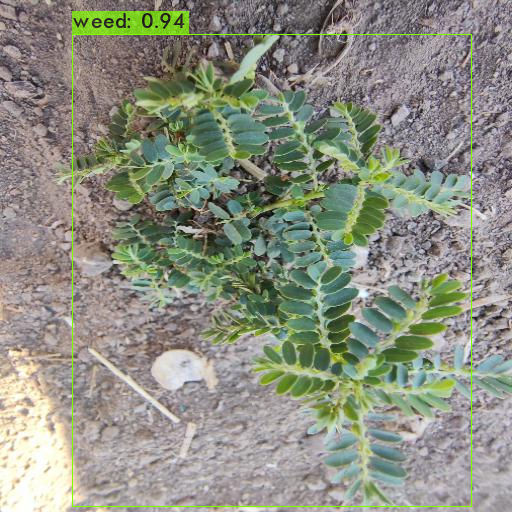

In [41]:
from IPython.display import Image, display

# image file path
image_path = "/content/darknet/predictions.jpg"

# Display the image
display(Image(filename=image_path))


In [45]:
!cp /content/darknet/data/train_data/train.txt /content/darknet/data

## CALCULATE MAP METRICS FOR TRAINED WEIGHTS

#### Before running the below code, make sure crop_weed_detection.weights is downloaded from the google drive link provided in read me section of github and paste it in WeedDetection/testing_and_detection/data/weights path in your google drive

In [52]:
!cp /mydrive/WeedDetection/testing_and_detection/data/weights/crop_weed_detection.weights /content/darknet/backup

In [54]:
!./darknet detector map data/obj.data cfg/cnn_config.cfg backup/crop_weed_detection.weights

 CUDA-version: 11080 (12000), cuDNN: 8.9.0, GPU count: 1  
 OpenCV version: 4.5.4
valid: Using default 'data/train.txt'
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 32, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    512 x 512 x   3 ->  512 x 512 x  32 0.453 BF
   1 conv     64       3 x 3/ 2    512 x 512 x  32 ->  256 x 256 x  64 2.416 BF
   2 conv     32       1 x 1/ 1    256 x 256 x  64 ->  256 x 256 x  32 0.268 BF
   3 conv     64       3 x 3/ 1    256 x 256 x  32 ->  256 x 256 x  64 2.416 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 256 x 256 x  64 0.004 BF
   5 conv    128       3 x 3/ 2    256 x 256 x  64 ->  128 x 128 x 128 2.416 BF
   6 conv     64       1 x 1/ 1    128 x 128 x 128 ->  128 x 128 x  64 0.268 BF
   7 conv    128       3 x 3/ 1    128 x 128 x  64 ->  128 x 128 x